In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.utils.data as Data

In [3]:
sentences = ["jack like dog", "jack like cat", "jack like animal",
             "dog cat animal", "banana apple cat dog like", "dog fish milk like",
             "dog cat animal like", "jack like apple", "apple like", "jack like banana",
             "apple banana jack movie book music like", "cat dog hate", "cat dog like"]
word_sequence = " ".join(sentences).split()  # ['jack', 'like', 'dog', 'jack', 'like', 'cat', 'animal',...]
vocab = list(set(word_sequence))  # build words vocabulary，去重
word2idx = {w: i for i, w in enumerate(vocab)}

In [4]:
print(word2idx)

{'jack': 0, 'like': 1, 'animal': 2, 'hate': 3, 'banana': 4, 'dog': 5, 'movie': 6, 'book': 7, 'fish': 8, 'music': 9, 'cat': 10, 'apple': 11, 'milk': 12}


In [5]:
# 模型的相关参数
batch_size = 8
embedding_size = 2  # 词向量的维度是2
C = 2  # window size，即左右各两个周围词
voc_size = len(vocab)  # 词典的大小

class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        # W：one-hot到词向量的hidden layer
        self.W = nn.Parameter(torch.randn(voc_size, embedding_size))
        # V：输出层的参数
        self.V = nn.Parameter(torch.randn(embedding_size, voc_size))

    def forward(self, X):
        # X : [batch_size, voc_size] one-hot
        # torch.mm only for 2 dim matrix, but torch.matmul can use to any dim
        hidden_layer = torch.matmul(X, self.W)  # hidden_layer : [batch_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.V)  # output_layer : [batch_size, voc_size]
        return output_layer


model = Word2Vec()
criterion = nn.CrossEntropyLoss()  # 多分类，交叉熵损失函数
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Adam优化算法

In [6]:
# 数据预处理
skip_grams = []
print(word2idx)
for idx in range(C, len(word_sequence) - C):
    center = word2idx[word_sequence[idx]]  # 中心词

    context_idx = list(range(idx - C, idx)) + list(range(idx + 1, idx + C + 1))  # 中心词左边的2个词+中心词右边的两个词
    context = [word2idx[word_sequence[i]] for i in context_idx]
    for w in context:
        skip_grams.append([center, w])  # 中心词和每个周围词组成一个训练样本


def make_data(skip_grams):
    input_data = []
    output_data = []
    for i in range(len(skip_grams)):
        # input_data转换为one-hot形式，output_data合成一个list
        input_data.append(np.eye(voc_size)[skip_grams[i][0]])
        output_data.append(skip_grams[i][1])
    return input_data, output_data


print(skip_grams)
input_data, output_data = make_data(skip_grams)
print(input_data)
print(output_data)
input_data, output_data = torch.Tensor(input_data), torch.LongTensor(output_data)
dataset = Data.TensorDataset(input_data, output_data)
loader = Data.DataLoader(dataset, batch_size, True)

{'jack': 0, 'like': 1, 'animal': 2, 'hate': 3, 'banana': 4, 'dog': 5, 'movie': 6, 'book': 7, 'fish': 8, 'music': 9, 'cat': 10, 'apple': 11, 'milk': 12}
[[5, 0], [5, 1], [5, 0], [5, 1], [0, 1], [0, 5], [0, 1], [0, 10], [1, 5], [1, 0], [1, 10], [1, 0], [10, 0], [10, 1], [10, 0], [10, 1], [0, 1], [0, 10], [0, 1], [0, 2], [1, 10], [1, 0], [1, 2], [1, 5], [2, 0], [2, 1], [2, 5], [2, 10], [5, 1], [5, 2], [5, 10], [5, 2], [10, 2], [10, 5], [10, 2], [10, 4], [2, 5], [2, 10], [2, 4], [2, 11], [4, 10], [4, 2], [4, 11], [4, 10], [11, 2], [11, 4], [11, 10], [11, 5], [10, 4], [10, 11], [10, 5], [10, 1], [5, 11], [5, 10], [5, 1], [5, 5], [1, 10], [1, 5], [1, 5], [1, 8], [5, 5], [5, 1], [5, 8], [5, 12], [8, 1], [8, 5], [8, 12], [8, 1], [12, 5], [12, 8], [12, 1], [12, 5], [1, 8], [1, 12], [1, 5], [1, 10], [5, 12], [5, 1], [5, 10], [5, 2], [10, 1], [10, 5], [10, 2], [10, 1], [2, 5], [2, 10], [2, 1], [2, 0], [1, 10], [1, 2], [1, 0], [1, 1], [0, 2], [0, 1], [0, 1], [0, 11], [1, 1], [1, 0], [1, 11], [1, 1

C:\Users\xht\AppData\Local\Temp\ipykernel_12872\4287465907.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  input_data, output_data = torch.Tensor(input_data), torch.LongTensor(output_data)


In [7]:
# 训练
for epoch in range(2000):
    for i, (batch_x, batch_y) in enumerate(loader):
        batch_x = batch_x
        batch_y = batch_y
        pred = model(batch_x)
        loss = criterion(pred, batch_y)
        if (epoch + 1) % 1000 == 0:
            print(epoch + 1, i, loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

1000 0 1.992314338684082
1000 1 1.9977128505706787
1000 2 2.226271867752075
1000 3 1.6137194633483887
1000 4 2.04046630859375
1000 5 1.8460129499435425
1000 6 2.3816978931427
1000 7 1.9979182481765747
1000 8 1.86244797706604
1000 9 2.345310688018799
1000 10 1.8782294988632202
1000 11 2.5808303356170654
1000 12 2.3413197994232178
1000 13 1.8940153121948242
1000 14 1.8232722282409668
1000 15 2.335550308227539
1000 16 2.074021339416504
1000 17 1.975425124168396
1000 18 2.5642449855804443
1000 19 2.181518793106079
1000 20 2.130711793899536
2000 0 2.247539758682251
2000 1 2.2117350101470947
2000 2 1.686153531074524
2000 3 2.5303235054016113
2000 4 2.0071980953216553
2000 5 1.7835793495178223
2000 6 1.9060038328170776
2000 7 1.8551568984985352
2000 8 2.358760356903076
2000 9 2.1101951599121094
2000 10 1.780425786972046
2000 11 2.0847511291503906
2000 12 1.889693260192871
2000 13 2.0877089500427246
2000 14 1.978266954421997
2000 15 2.3628628253936768
2000 16 2.4817636013031006
2000 17 1.97686

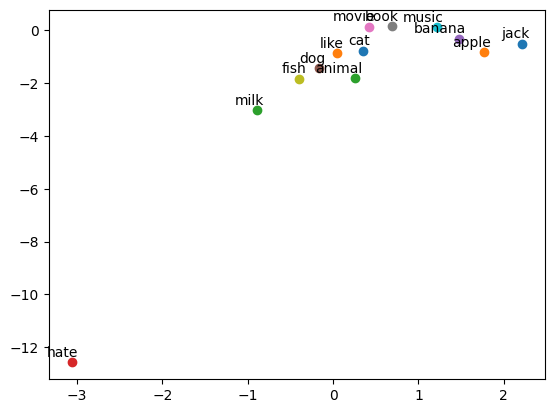

In [8]:

# 将每个词在平面直角坐标系中标记出来，看看各个词之间的距离
for i, label in enumerate(vocab):
    W, WT = model.parameters()
    # W是词向量矩阵
    x, y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()